# **Import the data set**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

programs = pd.read_csv('graduate_program_recommendation_data.csv', na_values=['NA', 'N/A', 'None', ''])
conversion = pd.read_csv('score.csv')

# **Data preprocessing**

In [ ]:
programs.drop('userName', axis = 1, inplace = True)

programs.dropna(subset=['major'], inplace = True)

programs.drop('specialization', axis = 1, inplace = True)

programs.dropna(subset=['program'], inplace = True)

mask_toefl = (programs['toeflScore'] <= 120)
programs.loc[~mask_toefl, :] = ''

programs.dropna(subset=['greV', 'greQ'], inplace=True)

def scoreConversion(feature):
    '''
    Utility function: Gre Old Score to New Score
    '''
    gre_score = list(programs[feature])
    for i in range(len(gre_score)):
        try:
            score = int(gre_score[i])
            if score > 170:
                if feature == 'greV':
                    gre_score[i] = conversion['newV'].get(score, score)
                elif feature == 'greQ':
                    gre_score[i] = conversion['newQ'].get(score, score)
        except (ValueError, KeyError):
            continue
    return gre_score


programs['greV'] = scoreConversion('greV')
programs['greQ'] = scoreConversion('greQ')

programs.drop('userProfileLink', axis = 1, inplace = True)

programs['journalPubs'].fillna(0, inplace=True)

programs.drop('termAndYear', axis = 1, inplace = True)

mask_confPubs1 = programs['confPubs'] == 'Fall - 2012'
mask_confPubs2 = programs['confPubs'] == 'Fall - 2014'
mask_confPubs3 = programs['confPubs'] == 'Fall - 2015'
mask_confPubs4 = programs['confPubs'] == ''
programs.loc[mask_confPubs1, :] = 1
programs.loc[mask_confPubs2, :] = 1
programs.loc[mask_confPubs3, :] = 1
programs.loc[mask_confPubs4, :] = 0

programs.dropna(subset=['ugCollege'], inplace = True)
programs = programs.loc[programs['ugCollege'] != 0, :]

programs.drop('gmatA', axis = 1, inplace = True)
programs.drop('gmatQ', axis = 1, inplace = True)
programs.drop('gmatV', axis = 1, inplace = True)
programs.drop('toeflEssay', axis = 1, inplace = True)
programs.drop('greA', axis = 1, inplace = True)
programs.drop('topperCgpa', axis = 1, inplace = True)
programs.drop('department', axis = 1, inplace = True)


def normalize_gpa(data, cgpa, totalcgpa):
    '''
    Utility function to normalize CGPA
    '''
    cgpa = data[cgpa].tolist()
    totalcgpa = data[totalcgpa].tolist()
    for i in range(len(cgpa)):
        if totalcgpa[i] != 0:
            cgpa[i] = cgpa[i] / totalcgpa[i]
        else:
            cgpa[i] = 0
    data["cgpa"] = cgpa
    return data

programs = normalize_gpa(programs, 'cgpa', 'cgpaScale')
programs.drop('cgpaScale', axis = 1, inplace = True)

dtype_change_num = ['researchExp', 'industryExp', 'toeflScore', 'internExp', 'greV', 'greQ', 'journalPubs', 'confPubs', 'cgpa']
for i in dtype_change_num:
  programs[i] = pd.to_numeric(programs[i])

dtype_change_cat = ['major', 'program', 'ugCollege', 'univName']
for j in dtype_change_cat:
  programs[j] = programs[j].apply(str)
programs


,major,researchExp,industryExp,toeflScore,program,internExp,greV,greQ,journalPubs,confPubs,ugCollege,cgpa,univName,admit
0,Systems and Control,0,18,112.0,MS,5.0,160.0,167.0,0,0,Dharamsinh Desai University,0.8500,Worcester Polytechnic Institute,1
2,(MIS / MSIM / MSIS / MSIT),0,66,94.0,MS,0.0,146.0,157.0,0,0,IET DAVV,0.7828,Worcester Polytechnic Institute,1
4,MIS,0,0,81.0,MS,0.0,420.0,770.0,0,0,Pune University,0.5700,Worcester Polytechnic Institute,1
6,MIS,0,0,104.0,MS,0.0,150.0,161.0,0,0,University of Mumbai,0.6220,Worcester Polytechnic Institute,1
7,MIS-management related courses,0,0,95.0,MS,0.0,147.0,156.0,0,0,MU,0.5200,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53637,Aerospace Engineering,0,0,87.0,MS,0.0,150.0,159.0,0,0,JNTU,0.6500,Arizona State University,0
53639,Mechanical Engineering,0,24,98.0,MS,12.0,151.0,152.0,0,0,University of Mumbai,0.7100,Arizona State University,0
53640,Electronics and Communication,0,0,115.0,MS,0.0,550.0,800.0,0,0,BITS Hyderabad,0.6500,Arizona State University,0
53642,Electrical Engineering,0,0,99.0,MS,0.0,470.0,760.0,0,0,Panjab University,0.7050,Arizona State University,0


In [ ]:
programs.describe

<bound method NDFrame.describe of                                 major  researchExp  industryExp  toeflScore  \
0                 Systems and Control            0           18       112.0   
2          (MIS / MSIM / MSIS / MSIT)            0           66        94.0   
4                                 MIS            0            0        81.0   
6                                 MIS            0            0       104.0   
7      MIS-management related courses            0            0        95.0   
...                               ...          ...          ...         ...   
53637           Aerospace Engineering            0            0        87.0   
53639          Mechanical Engineering            0           24        98.0   
53640   Electronics and Communication            0            0       115.0   
53642          Electrical Engineering            0            0        99.0   
53643          Electrical Engineering            0            0       104.0   

      program  in

In [ ]:
programs.corr()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,journalPubs,confPubs,cgpa
researchExp,1.000000,0.145564,0.035295,0.170692,-0.095887,-0.103443,0.189334,0.386665,0.018358
industryExp,0.145564,1.000000,0.006002,0.226517,-0.259872,-0.275237,0.109760,0.123852,0.000666
toeflScore,0.035295,0.006002,1.000000,0.025169,0.119292,0.048031,-0.023387,0.013643,0.034037
internExp,0.170692,0.226517,0.025169,1.000000,-0.138173,-0.146658,0.132360,0.148988,0.014545
greV,-0.095887,-0.259872,0.119292,-0.138173,1.000000,0.947132,-0.103472,-0.114171,-0.018379
greQ,-0.103443,-0.275237,0.048031,-0.146658,0.947132,1.000000,-0.110038,-0.121544,-0.024113
journalPubs,0.189334,0.109760,-0.023387,0.132360,-0.103472,-0.110038,1.000000,0.269086,0.012658
confPubs,0.386665,0.123852,0.013643,0.148988,-0.114171,-0.121544,0.269086,1.000000,0.027845
cgpa,0.018358,0.000666,0.034037,0.014545,-0.018379,-0.024113,0.012658,0.027845,1.000000


In [ ]:
gpa = pd.pivot_table(data=programs, values ='cgpa',columns ='univName',index ='admit')
gpa

univName,1,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.719651,0.758365,0.767644,0.712950,0.831969,0.771135,0.640469,0.788180,0.653408,...,0.690210,0.646859,0.803169,0.718465,0.732161,0.760563,0.801149,0.785589,0.624584,0.621505
1,1.0,0.772896,0.576833,0.754546,0.721456,0.763429,0.812594,0.648206,0.788944,0.786333,...,0.796017,0.687317,0.837892,0.744687,0.767563,0.717936,0.836986,0.793876,0.693071,0.614874


In [ ]:
research = pd.pivot_table(data=programs, values ='researchExp',columns ='univName',index ='admit')
research

univName,1,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.366667,0.608696,0.292994,0.226974,0.321429,0.472669,0.413793,0.617670,0.230769,...,0.300395,0.158879,0.642225,0.304927,0.796226,0.571429,0.66388,0.378378,0.000000,0.285714
1,1.0,0.500826,0.000000,0.414073,0.376022,0.315217,0.124402,0.205882,0.342975,0.000000,...,0.348778,0.095930,0.939850,0.204986,0.565543,0.928934,0.39196,0.920949,1.026786,0.000000


In [ ]:
industry = pd.pivot_table(data=programs, values ='industryExp',columns ='univName',index ='admit')
industry

univName,1,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,NaN,5.503226,4.695652,4.125265,2.812500,4.750000,5.572347,4.965517,4.098514,0.0,...,7.592885,5.17757,3.912769,6.018642,4.939623,6.188776,5.127090,4.667230,7.052632,1.452381
1,1.0,4.062741,0.000000,2.958051,3.577657,2.472826,2.148325,1.993464,1.752066,0.0,...,2.668071,3.34593,2.661654,3.810249,4.625468,4.868020,2.673367,3.561265,3.741071,4.678161


In [ ]:
programs.groupby("admit").describe()[['cgpa','internExp','industryExp']].transpose()

admit                         0             1
cgpa        count  22693.000000  23550.000000
            mean       0.752738      0.759079
            std        0.293732      0.369666
            min        0.000000      0.000000
            25%        0.684800      0.700000
            50%        0.756000      0.773000
            75%        0.830000      0.847000
            max       15.750000     18.250000
internExp   count  22693.000000  23550.000000
            mean       0.543427      0.407771
            std        2.732446      2.345730
            min        0.000000      0.000000
            25%        0.000000      0.000000
            50%        0.000000      0.000000
            75%        0.000000      0.000000
            max       96.000000     96.000000
industryExp count  22693.000000  23550.000000
            mean       4.814657      3.539575
            std       12.897128     11.251269
            min        0.000000      0.000000
            25%        0.000000      0.000000
            50%        0.000000      0.000000
            75%        0.000000      0.000000
            max      132.000000    132.000000

<Axes: xlabel='cgpa', ylabel='univName'>

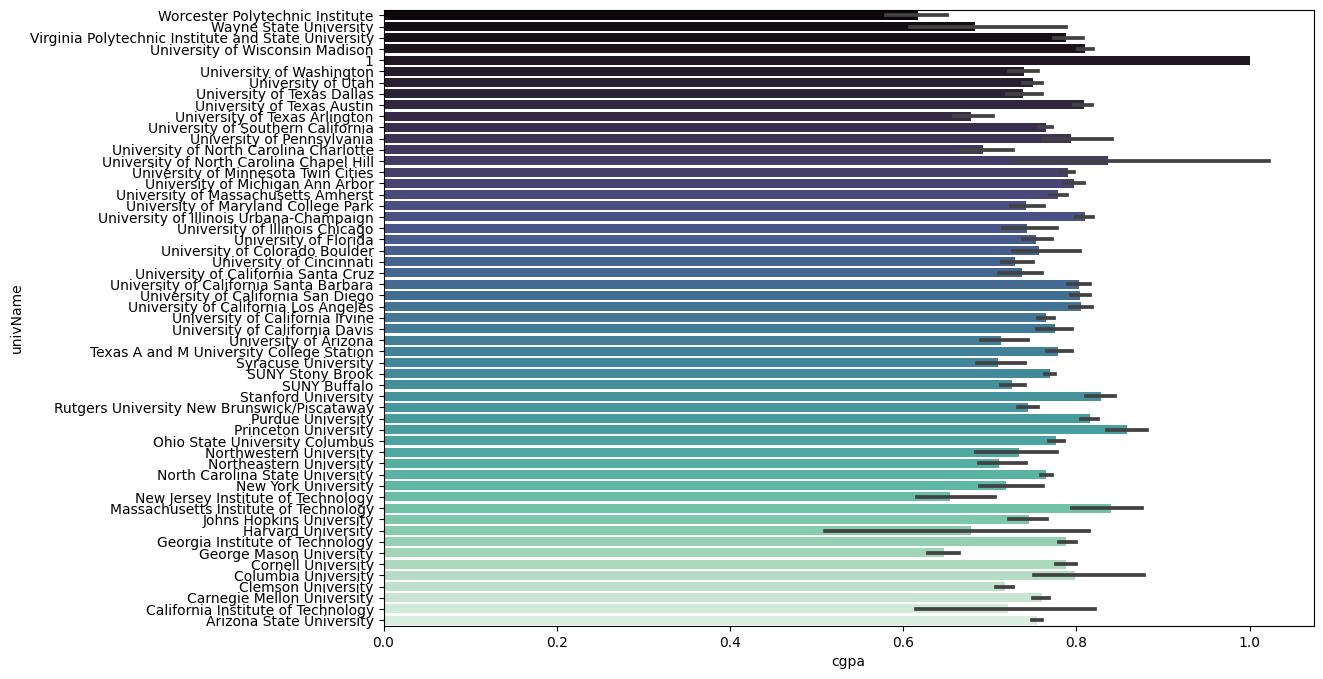

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.barplot(x='cgpa',y='univName',data=programs,palette='mako',color='yellow')

<Axes: xlabel='researchExp', ylabel='univName'>

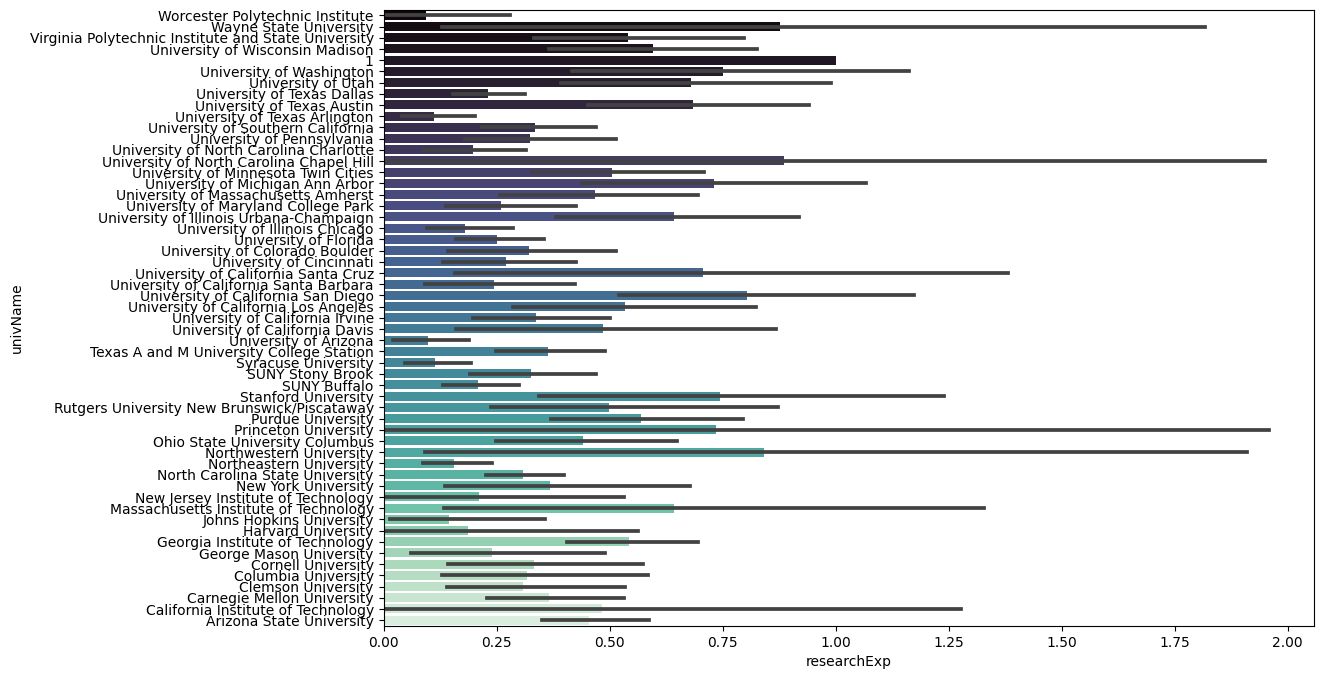

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='researchExp',y='univName',data=programs,palette='mako',color='yellow')

<Axes: xlabel='industryExp', ylabel='univName'>

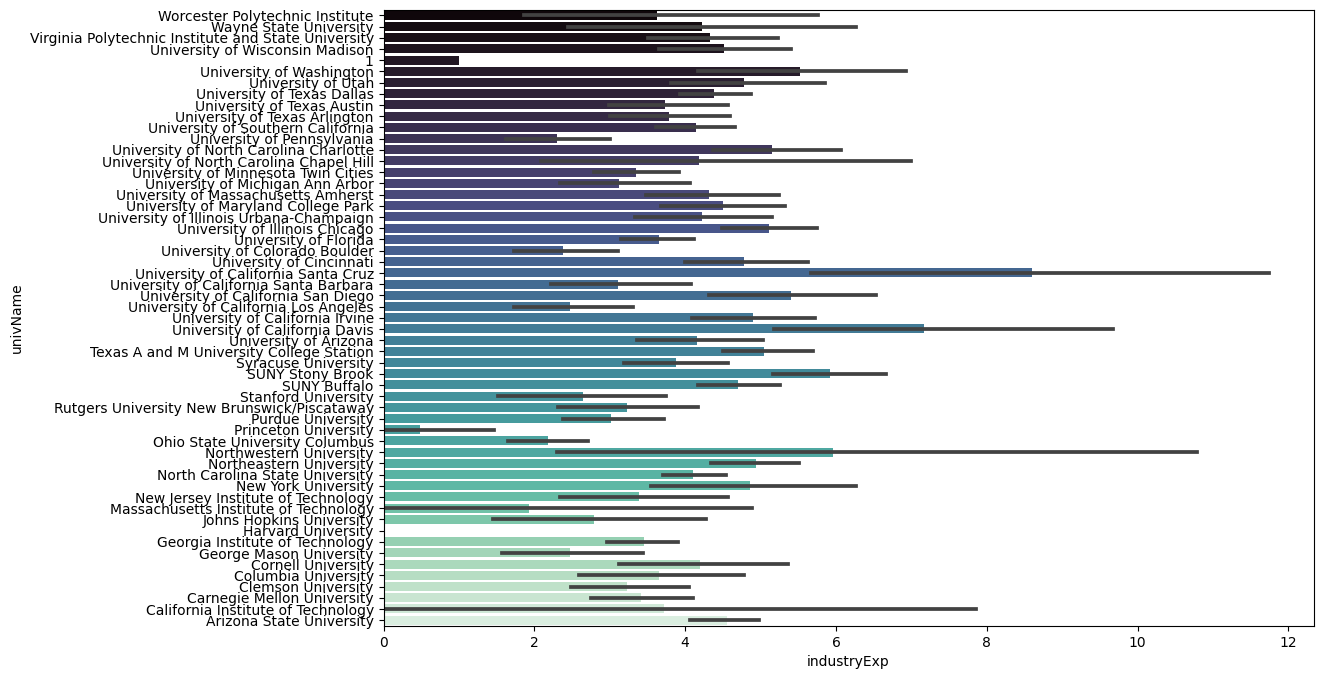

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='industryExp',y='univName',data=programs,palette='mako',color='yellow')

<Axes: xlabel='journalPubs', ylabel='univName'>

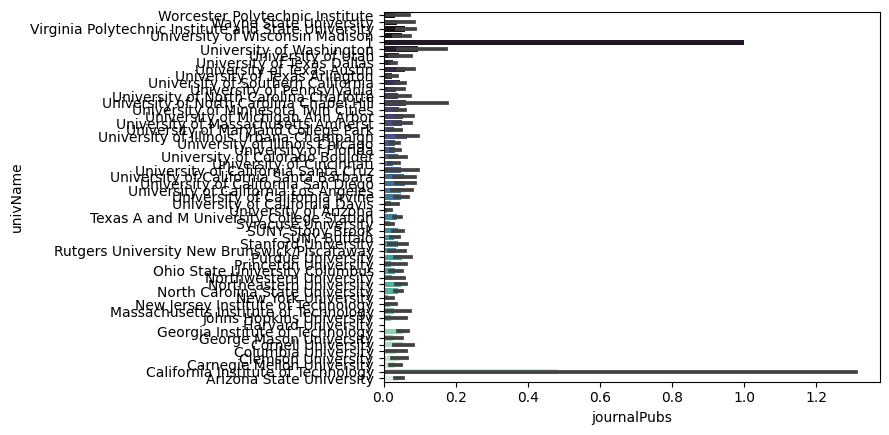

In [ ]:
import seaborn as sns
sns.barplot(x='journalPubs',y='univName',data=programs,palette='mako',color='yellow')

In [ ]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np


##Split
train_validation_set, test_set = train_test_split(programs, test_size=0.2, random_state=42)
train_set, validation_set = train_test_split(train_validation_set, test_size=0.25, random_state=42)

programs_labels = train_set["admit"].copy()
train_set = train_set.drop("admit", axis=1)

validation_labels = validation_set["admit"].copy()
validation_set = validation_set.drop("admit", axis=1)

test_labels = test_set["admit"].copy()
test_set = test_set.drop("admit", axis=1)


cat_attribs = ['major']

#word embedding:
def train_word_embedding(data, attributes, vector_size=30):
    sentences = []
    for attrib in attributes:
        unique_categories = data[attrib].unique()
        sentences.extend([[cat] for cat in unique_categories if isinstance(cat, str)])

    model = Word2Vec(sentences, vector_size=vector_size, window=1, min_count=1, workers=4)
    return model


def apply_word_embedding(data, attributes, model):
    embeddings_df = pd.DataFrame()
    for attrib in attributes:
        # Apply the word embedding
        embeddings = data[attrib].apply(lambda x: model.wv[x] if x in model.wv else np.zeros(model.vector_size))

        # Convert to DataFrame and add prefix to column names
        embeddings_df_attrib = embeddings.apply(pd.Series)
        embeddings_df_attrib.columns = [f"{attrib}_{col}" for col in embeddings_df_attrib.columns]

        # Concatenate with the main DataFrame
        embeddings_df = pd.concat([embeddings_df, embeddings_df_attrib], axis=1)

    return embeddings_df



w2v_model = train_word_embedding(train_set, cat_attribs)
train_set_cat_embedded = apply_word_embedding(train_set, cat_attribs, w2v_model)
validation_set_cat_embedded = apply_word_embedding(validation_set, cat_attribs, w2v_model)
test_set_cat_embedded = apply_word_embedding(test_set, cat_attribs, w2v_model)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Use One Hot Encoder to process 'program'
# cat_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# df_program = train_set[['program', 'ugCollege', 'univName']]
# program_cat_1hot = cat_encoder.fit_transform(df_program)
# print(program_cat_1hot)


list1 = ['program', 'ugCollege', 'univName', 'major', 'program']
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, dtype_change_num),
        ("cat", OneHotEncoder(handle_unknown='ignore'),list1),
    ])

train_set_num_program = full_pipeline.fit_transform(train_set)
validation_set_num_program = full_pipeline.transform(validation_set)
test_set_num_program = full_pipeline.transform(test_set)
train_set_num_program = pd.DataFrame.sparse.from_spmatrix(train_set_num_program)
validation_set_num_program = pd.DataFrame.sparse.from_spmatrix(validation_set_num_program)
test_set_num_program = pd.DataFrame.sparse.from_spmatrix(test_set_num_program)
# print(train_set_num_program)

train_none_embedding = train_set_num_program.reset_index(drop=True)
test_none_embedding = test_set_num_program.reset_index(drop=True)

train_set_cat_embedded = train_set_cat_embedded.reset_index(drop=True)
validation_set_cat_embedded = validation_set_cat_embedded.reset_index(drop=True)
test_set_cat_embedded = test_set_cat_embedded.reset_index(drop=True)


# none_embedding = none_embedding.dropna(axis = 0, inplace = True)
# train_set_cat_embedded = train_set_cat_embedded.dropna(axis = 0, inplace = True)

train_set_final = pd.concat([train_set_num_program, train_set_cat_embedded], axis=1)
validation_set_final = pd.concat([validation_set_num_program, validation_set_cat_embedded], axis=1)
test_set_final = pd.concat([test_set_num_program, test_set_cat_embedded], axis=1)
# train_set_final = train_set_final.iloc[:len(train_set_final)//2, :]
# programs_labels = programs_labels.iloc[:len(programs_labels)//2]
print(type(train_set_final))
print(type(programs_labels))





<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# **Convert the training set and test set to numpy.**

In [ ]:

train_set_final_np = train_set_final.to_numpy()
test_set_final_np = test_set_final.to_numpy()
programs_labels = programs_labels.astype('int')
test_labels = test_labels.astype('int')
print(type(train_set_final_np))
print(type(train_set_num_program))


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


# **Fit into various models and calculate accuracy**

 KNN Classifier Accuracy: 0.5833


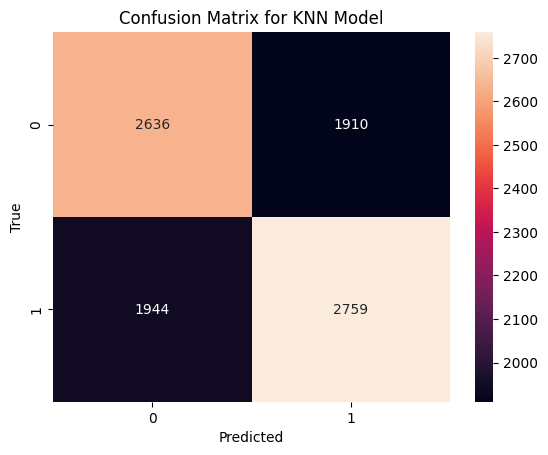

In [ ]:

# #This section is fitting model and compare the results(accuracy)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# # #KNN


knn = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
knn.fit(train_set_num_program, programs_labels)

predicted_labels = knn.predict(test_set_num_program)

# Evaluate the model
accuracy = sklearn.metrics.accuracy_score(test_labels, predicted_labels)
print(f" KNN Classifier Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Model')
plt.show()


In [ ]:
#SVM

# rbf kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(train_set_final_np, programs_labels)

svm_rbf_predict = svm_rbf.predict(test_set_final_np)

svm_accuracy = accuracy_score(test_labels, svm_rbf_predict)
print(f"Accuracy for the SVM rbf kernel is: {svm_accuracy:.4f}")

#polly kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(train_set_final_np, programs_labels)
svm_poly_predict = svm_poly.predict(test_set_final_np)

svm_accuracy_poly = accuracy_score(test_labels, svm_poly_predict)
print(f"Accuracy for the SVM polly kernel is: {svm_accuracy_poly:.4f}")

#sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(train_set_final_np, programs_labels)
svm_sigmoid_predict = svm_sigmoid.predict(test_set_final_np)

svm_accuracy_sigmoid = accuracy_score(test_labels, svm_sigmoid_predict)
print(f"Accuracy for the SVM sigmoid kernel is: {svm_accuracy_sigmoid:.4f}")

Accuracy for the SVM rbf kernel is: 0.7099
Accuracy for the SVM polly kernel is: 0.7000
Accuracy for the SVM sigmoid kernel is: 0.5659


In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=15)
dt.fit(train_set_final_np, programs_labels)
dt_predict = dt.predict(test_set_final_np)
dt_accuracy = accuracy_score(test_labels, dt_predict)
print(f"Accuracy for DecisionTree is: {dt_accuracy:.4f}") #0.6962

#Use GridSearch To find the best parameter It takes long time to run
tree_param_grid = {
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,6]
}

tree_grid_search = GridSearchCV(
    dt,
    tree_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs =-1
)
tree_grid_search.fit(train_set_final_np, programs_labels)
print("Best result for Decision Tree grid search: ")
print(tree_grid_search.best_estimator_) # max_depth = 30, min_samples_split=15, random_state=42

programs_labels = programs_labels.astype('category').cat.codes
test_labels = test_labels.astype('category').cat.codes

Accuracy for DecisionTree is: 0.6466
Best result for Decision Tree grid search: 
DecisionTreeClassifier(max_depth=30, min_samples_leaf=6, min_samples_split=15,
                       random_state=42)


In [ ]:
#Random Forest
#
rf = RandomForestClassifier(random_state=42)
rf.fit(train_set_final_np, programs_labels)
rf_predict = rf.predict(test_set_final_np)
rf_accuracy = accuracy_score(test_labels, rf_predict)
print(f"Accuracy for RandomForest is: {rf_accuracy:.4f}")

Accuracy for RandomForest is: 0.7163


In [ ]:
#Neural Net
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_set_final.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_set_final_np, programs_labels, epochs=10, batch_size=32)
neural_net_accuracy = model.evaluate(test_set_final_np, test_labels, verbose=0)[1]
print(f"Accuracy for Neural Network is: {neural_net_accuracy:.4f}")

Epoch 1/10
868/868 [==============================] - 4s 3ms/step - loss: 0.6075 - accuracy: 0.6691
Epoch 2/10
868/868 [==============================] - 3s 3ms/step - loss: 0.5431 - accuracy: 0.7263
Epoch 3/10
868/868 [==============================] - 3s 3ms/step - loss: 0.5067 - accuracy: 0.7517
Epoch 4/10
868/868 [==============================] - 3s 3ms/step - loss: 0.4760 - accuracy: 0.7729
Epoch 5/10
868/868 [==============================] - 3s 3ms/step - loss: 0.4495 - accuracy: 0.7882
Epoch 6/10
868/868 [==============================] - 3s 3ms/step - loss: 0.4234 - accuracy: 0.8013
Epoch 7/10
868/868 [==============================] - 3s 3ms/step - loss: 0.4024 - accuracy: 0.8128
Epoch 8/10
868/868 [==============================] - 3s 3ms/step - loss: 0.3779 - accuracy: 0.8287
Epoch 9/10
868/868 [==============================] - 3s 3ms/step - loss: 0.3617 - accuracy: 0.8351
Epoch 10/10
868/868 [==============================] - 3s 3ms/step - loss: 0.3445 - accuracy: 0.8429

# **Summary of the Neural Network model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               224512    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 232833 (909.50 KB)
Trainable params: 232833 (909.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Change the label datatype**

In [ ]:
programs_labels = programs_labels.astype('int')
test_labels = test_labels.astype('int')
print(programs_labels.dtypes)

# **Plot**

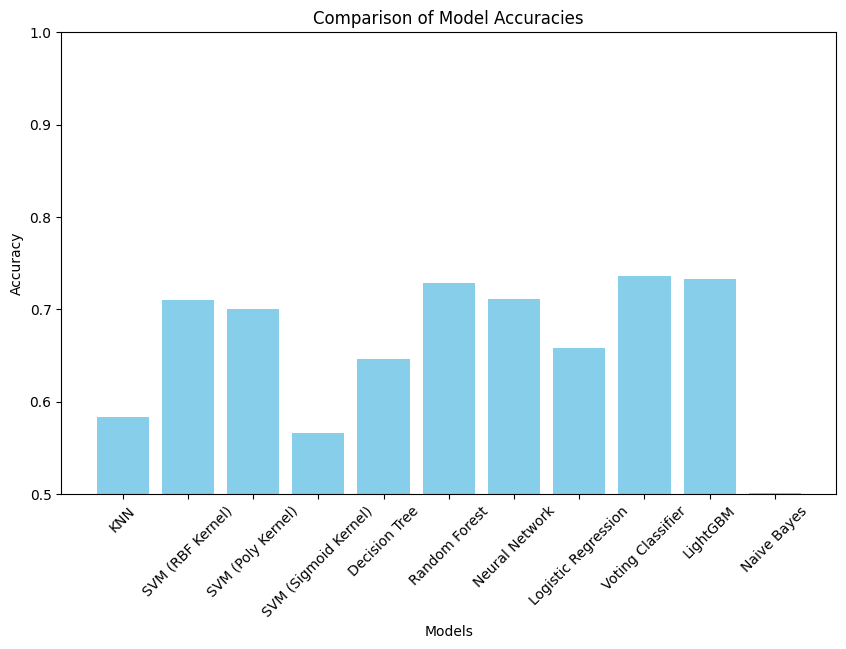

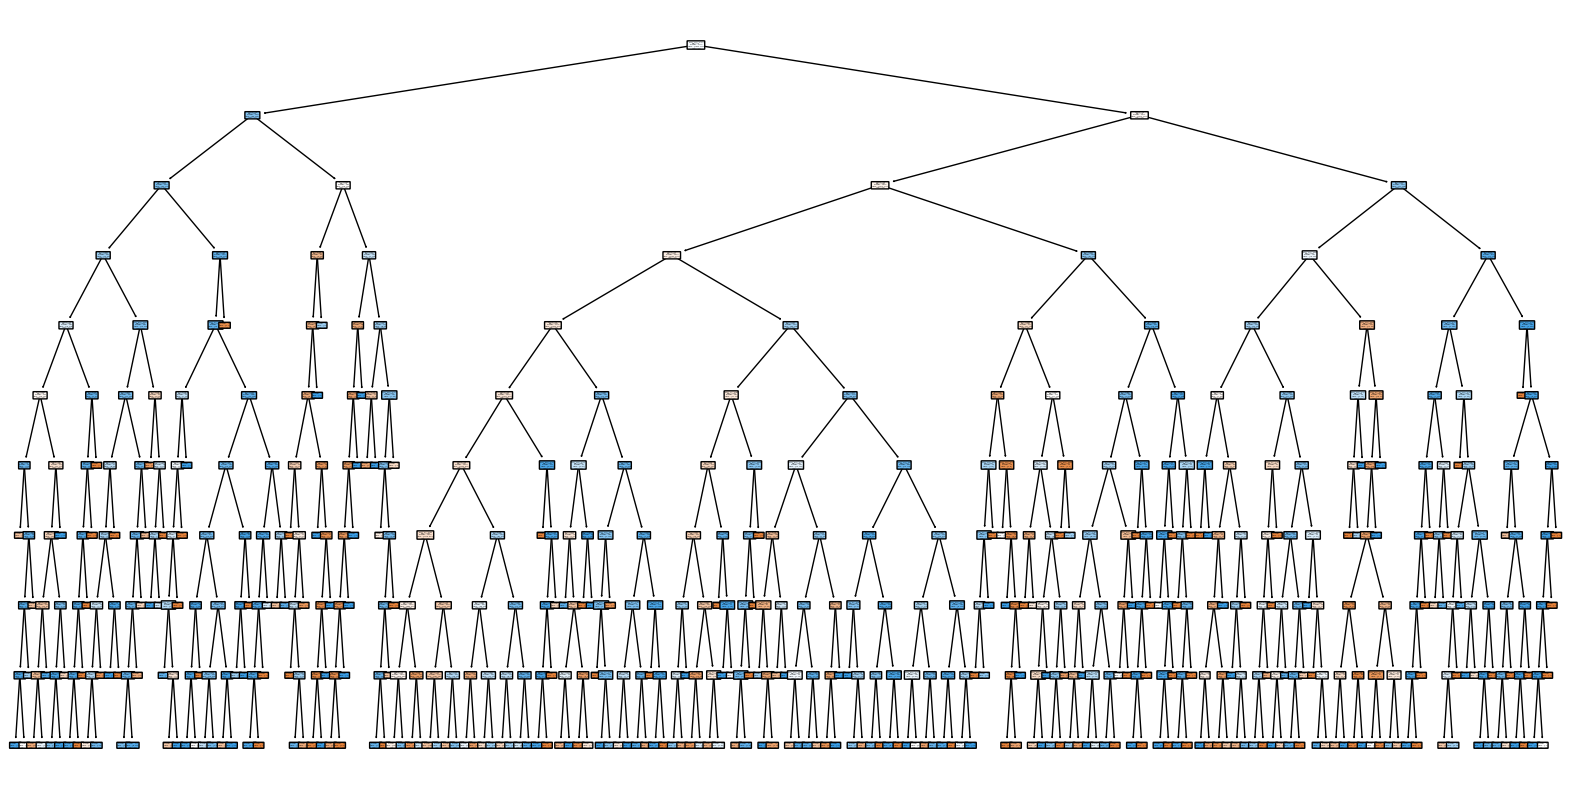

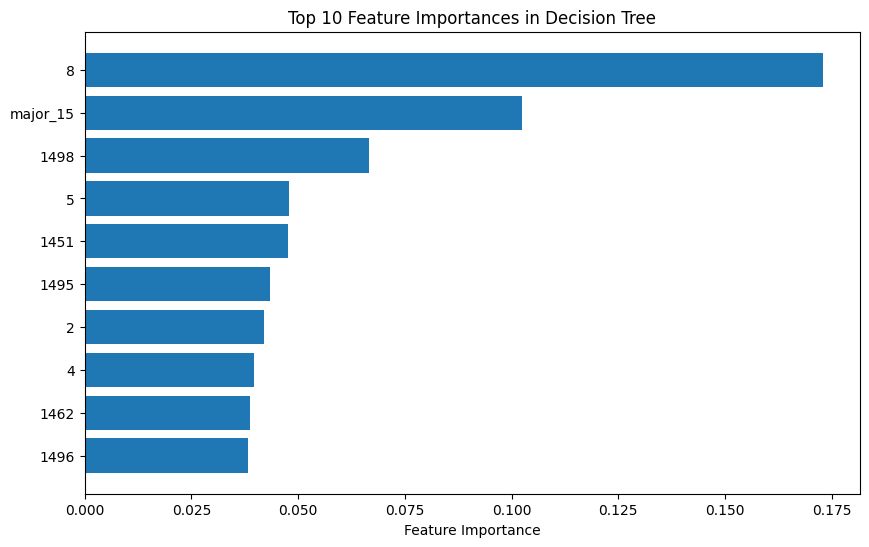

In [ ]:
# For plots
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
accuracy_values = {
    'KNN': 0.5833,
    'SVM (RBF Kernel)': 0.7099,
    'SVM (Poly Kernel)': 0.7000,
    'SVM (Sigmoid Kernel)': 0.5659,
    'Decision Tree': 0.6466,
    'Random Forest': 0.7285,
    'Neural Network': 0.7113,
    'Logistic Regression': 0.6581,
    'Voting Classifier': 0.7361,
    'LightGBM': 0.7323,
    'Naive Bayes': 0.5017
}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.5, 1.0])  # Adjust as per your accuracy range
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=train_set_final.columns, class_names=True, rounded=True)
plt.show()

feature_importances = dt.feature_importances_
feature_names = train_set_final.columns

feature_names = [str(name) for name in feature_names]

sorted_indices = np.argsort(feature_importances)[-10:]
top_features = np.array(feature_names)[sorted_indices]
top_importances = feature_importances[sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.show()



# **We tried more models:**

In [ ]:
#More models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

##Log Reg##
log_reg = LogisticRegression()
log_reg.fit(train_set_final_np, programs_labels)
log_reg_predict = log_reg.predict(test_set_final_np)
log_reg_accuracy = accuracy_score(test_labels, log_reg_predict)
print(f"Accuracy for Logistic Regression is: {log_reg_accuracy:.4f}")

coefficients = log_reg.coef_[0]  # Get the coefficients from the model
feature_names = train_set_final.columns  # Replace with your actual feature names

# Creating a DataFrame for better visualization
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the coefficients in descending order and selecting the top 10
top_10_coef = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

print("Top 10 largest coefficients in the Logistic Regression Model:")
print(top_10_coef)

#LightGBM
#
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(train_set_final, programs_labels)
lgb_pred = lgb_model.predict(test_set_final)
lgb_accuracy = accuracy_score(test_labels, lgb_pred)
print(f"Accuracy for LightGBM: {lgb_accuracy:.4f}")

#Naive Bayes
nb = GaussianNB()
nb.fit(train_set_final_np, programs_labels)
nb_predict = nb.predict(test_set_final_np)
nb_accuracy = accuracy_score(test_labels, nb_predict)
print(f"Accuracy for Naive Bayes is: {nb_accuracy:.4f}")

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('lgb', lgb_model)],
    voting='soft'
)
voting_clf.fit(train_set_final_np, programs_labels)
voting_accuracy = accuracy_score(test_labels, voting_clf.predict(test_set_final_np))
print(f"Accuracy for Voting Classifier: {voting_accuracy:.4f}")

Accuracy for Logistic Regression is: 0.6872
Top 10 largest coefficients in the Logistic Regression Model:
     Feature  Coefficient
1462    1462     3.052906
1457    1457     2.671329
1461    1461    -2.609493
1468    1468    -2.594383
1473    1473    -2.267590
1496    1496     2.017174
1497    1497    -1.997696
1503    1503     1.911651
1516    1516    -1.771622
449      449     1.630214
[LightGBM] [Info] Number of positive: 14146, number of negative: 13599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5806
[LightGBM] [Info] Number of data points in the train set: 27745, number of used features: 348
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509858 -> initscore=0.039436
[LightGBM] [Info] Start training from score 0.039436
Accuracy for LightGBM: 0.7323
Accuracy for Naive Bayes is: 0.5017
[LightGBM] [Info] Number of positive: 14146, numb